In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from IPython.display import display_json, display
import matplotlib.pyplot as plt

In [3]:
start_date = '1970-01-01'
end_date = dt.datetime.today()

In [4]:
stock = yf.Ticker("O")
df = pd.DataFrame(columns=["div yield", "Trailing annual div yield", "exDiv", "payout ratio"])
# df.loc["O"] = "24-12-22", "3.5%"
# df.loc["AMZN"] = "23-11-22", "2%"
df

,div yield,Trailing annual div yield,exDiv,payout ratio


In [3]:
stock = yf.Ticker("JHG")
tmp = stock.dividends
tmp
# a = stock.history(period="1y", interval="3mo")
# low = min(a["Low"])
# high = max(a["High"])
# change = ((max(a["High"]) - min(a["Low"])) / min(a["Low"])) * 100
# change
# list(data.columns)
# data.columns
# df = pd.DataFrame(index=tmp.index)
# df["Dividends"] = tmp
# df["Growth rate"] = ((df["Dividends"]/df["Dividends"].shift(1)) - 1) * 100
# df['Year'] = df.index.year
# df.index = df.index.year
# df = df.groupby(df.index).mean()
# df.columns
# df["Growth year"] = ((df["Dividends"]/df["Dividends"].shift(1)) - 1) * 100
# df["Growth rate"] = df["Growth year"].expanding().mean()
# df["Growth rate 5y"] = df["Growth year"].rolling(5).mean()
# df["Growth rate 3y"] = df["Growth year"].rolling(3).mean()
# df["Growth rate 10y"] = df["Growth year"].rolling(10).mean()
# df["Years grow"] = df.index - df.first_valid_index()
# df

Date
2017-08-16 00:00:00-04:00    0.32
2017-11-17 00:00:00-05:00    0.32
2018-02-15 00:00:00-05:00    0.32
2018-05-18 00:00:00-04:00    0.36
2018-08-10 00:00:00-04:00    0.36
2018-11-08 00:00:00-05:00    0.36
2019-02-14 00:00:00-05:00    0.36
2019-05-10 00:00:00-04:00    0.36
2019-08-09 00:00:00-04:00    0.36
2019-11-07 00:00:00-05:00    0.36
2020-02-14 00:00:00-05:00    0.36
2020-05-15 00:00:00-04:00    0.36
2020-08-07 00:00:00-04:00    0.36
2020-11-06 00:00:00-05:00    0.36
2021-02-16 00:00:00-05:00    0.36
2021-05-10 00:00:00-04:00    0.38
2021-08-06 00:00:00-04:00    0.38
2021-11-05 00:00:00-04:00    0.38
2022-02-11 00:00:00-05:00    0.38
2022-05-13 00:00:00-04:00    0.39
2022-08-05 00:00:00-04:00    0.39
2022-11-04 00:00:00-04:00    0.39
2023-02-10 00:00:00-05:00    0.39
Name: Dividends, dtype: float64

In [26]:
tickers = ["O", "T", "MMM", "IBM", "PSTL", "ENB", "BCE", "CSCO", "MRK", "STAG", "INPFX", "TIP", "AAPL", "MSFT", "JPM", "KO", "V", "COST", "JNJ", "VICI", "MCD", "ABBV", "ABR"]
# tickers = ["O", "T", "MMM"]

In [30]:
df = pd.DataFrame(columns=["div yield", "Trailing annual div yield", "exDiv", "payout ratio", "5 year yield average", "DGR", "Years of grow", "DGR3y", 
                          "DGR5y", "DGR10y"])

In [28]:
tickers = yf.Tickers(tickers)
for ticker in tickers.tickers:
    print(ticker, end="' ")
    stock = yf.Ticker(ticker)
    data = stock.info

    div_yield = data["dividendYield"]  # * 100
    div_ex = pd.to_datetime(data["exDividendDate"], unit='s')  # Ex date
    payout = data["payoutRatio"] # * 100
    trail_div_yield = data["trailingAnnualDividendYield"]  # * 100
    avg_yield_5y = data["fiveYearAvgDividendYield"]

    tmp = stock.dividends
    div_df = pd.DataFrame(index=tmp.index)
    div_df["Dividends"] = tmp
    div_df.index = div_df.index.year
    div_df = div_df.groupby(div_df.index).mean()
    div_df["Growth year"] = ((div_df["Dividends"]/div_df["Dividends"].shift(1)) - 1) * 100
    div_df["DGR"] = div_df["Growth year"].expanding().mean()
    div_df["DGR5y"] = div_df["Growth year"].rolling(5).mean()
    div_df["DGR3y"] = div_df["Growth year"].rolling(3).mean()
    div_df["DGR10y"] = div_df["Growth year"].rolling(10).mean()
    div_df["Years grow"] = div_df.index - div_df.first_valid_index()
    
    growth_rate = float(div_df.tail(1)["DGR"])
    growth_year = int(div_df.tail(1)["Years grow"])  # Years of growth
    growth_rate_3 = float(div_df.tail(1)["DGR3y"])
    growth_rate_5 = float(div_df.tail(1)["DGR5y"])
    growth_rate_10 = float(div_df.tail(1)["DGR10y"])
    
    df.loc[ticker] = div_yield, trail_div_yield, div_ex, payout, avg_yield_5y, growth_rate, growth_year, growth_rate_3, growth_rate_5, growth_rate_10
df["payout ratio"] *= 100
df["div yield"] *= 100
df["Trailing annual div yield"] *= 100

df.sort_index()

O
T
MMM
IBM
PSTL
ENB
BCE
CSCO
MRK
STAG
INPFX
TIP
AAPL
MSFT
JPM
KO
V
COST
JNJ
VICI
MCD
ABBV
ABR


,div yield,Trailing annual div yield,exDiv,payout ratio,5 year yield average,Growth rate,Years of grow,Growth rate 3y,Growth rate 5y,Growth rate 10y
AAPL,0.65,0.625174,2022-11-04,14.729999,0.98,468.068384,35.0,6.191018,8.201724,9.197138
ABBV,4.02,3.826323,2023-01-12,73.730004,4.36,14.391911,10.0,7.865190,10.619200,14.391911
ABR,10.91,10.497614,2022-11-17,78.950000,9.17,7.509414,18.0,10.561354,16.999079,15.513839
BCE,5.86,7.750533,2022-12-14,117.640000,5.52,149.974023,34.0,5.355586,4.737731,2.419702
COST,0.72,0.700381,2023-02-02,26.380000,0.82,74.265842,18.0,82.846909,38.686759,65.011421
CSCO,3.14,3.123707,2023-01-04,54.510000,2.93,18.505391,12.0,2.060181,3.523246,8.539803
ENB,6.43,8.400983,2023-02-14,126.480010,6.49,10.221437,32.0,6.180382,9.851278,10.176155
IBM,4.91,4.901451,2022-11-09,337.950020,4.82,18.628999,60.0,2.352645,3.170972,7.776065
INPFX,NaN,NaN,NaT,NaN,NaN,1.337350,10.0,-4.361852,0.717521,1.337350
JNJ,2.68,2.634851,2023-02-17,66.120005,2.59,13.630227,60.0,5.871655,6.034735,6.371459


In [29]:
df.sort_values("div yield", ascending=False)

,div yield,Trailing annual div yield,exDiv,payout ratio,5 year yield average,Growth rate,Years of grow,Growth rate 3y,Growth rate 5y,Growth rate 10y
ABR,10.91,10.497614,2022-11-17,78.950000,9.17,7.509414,18.0,10.561354,16.999079,15.513839
ENB,6.43,8.400983,2023-02-14,126.480010,6.49,10.221437,32.0,6.180382,9.851278,10.176155
PSTL,6.14,6.045752,2022-11-04,653.570000,NaN,37.082617,3.0,37.082617,NaN,NaN
BCE,5.86,7.750533,2022-12-14,117.640000,5.52,149.974023,34.0,5.355586,4.737731,2.419702
T,5.44,0.000000,2023-01-09,NaN,7.00,2.665191,39.0,-17.592272,-9.763206,-3.816809
MMM,5.28,5.248789,2022-11-17,58.550000,3.38,9.025397,60.0,1.146427,5.013263,10.137068
IBM,4.91,4.901451,2022-11-09,337.950020,4.82,18.628999,60.0,2.352645,3.170972,7.776065
VICI,4.59,4.326074,2022-12-21,140.000000,NaN,10.763204,4.0,8.578500,NaN,NaN
O,4.39,4.344564,2023-01-31,298.280000,4.31,4.640202,28.0,4.106720,3.857657,5.754875
STAG,4.14,4.104729,2023-01-30,108.770000,4.67,-4.370850,11.0,0.833372,0.754621,-5.861654


<Figure size 1440x864 with 0 Axes>

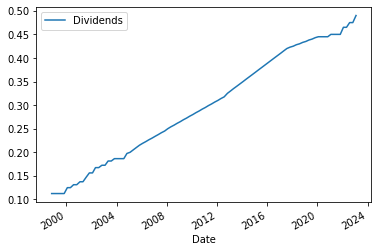

In [16]:
ticker = "EPD"

stock = yf.Ticker(ticker)
tmp = stock.dividends
div_df = pd.DataFrame(index=tmp.index)
div_df["Dividends"] = tmp
# div_df.index = div_df.index.year
div_df = div_df.groupby(div_df.index).mean()
# div_df["Growth year"] = ((div_df["Dividends"]/div_df["Dividends"].shift(1)) - 1) * 100
# div_df["DGR5y"] = div_df["Growth year"].rolling(5).mean() 
div_df["chg"] = div_df["Dividends"].diff()
div_df["chg"] = div_df["chg"].where(div_df["chg"] != 0, np.nan)
plt.figure(figsize=(20, 12))
div_df.plot(kind='line', y='Dividends')
plt.show()


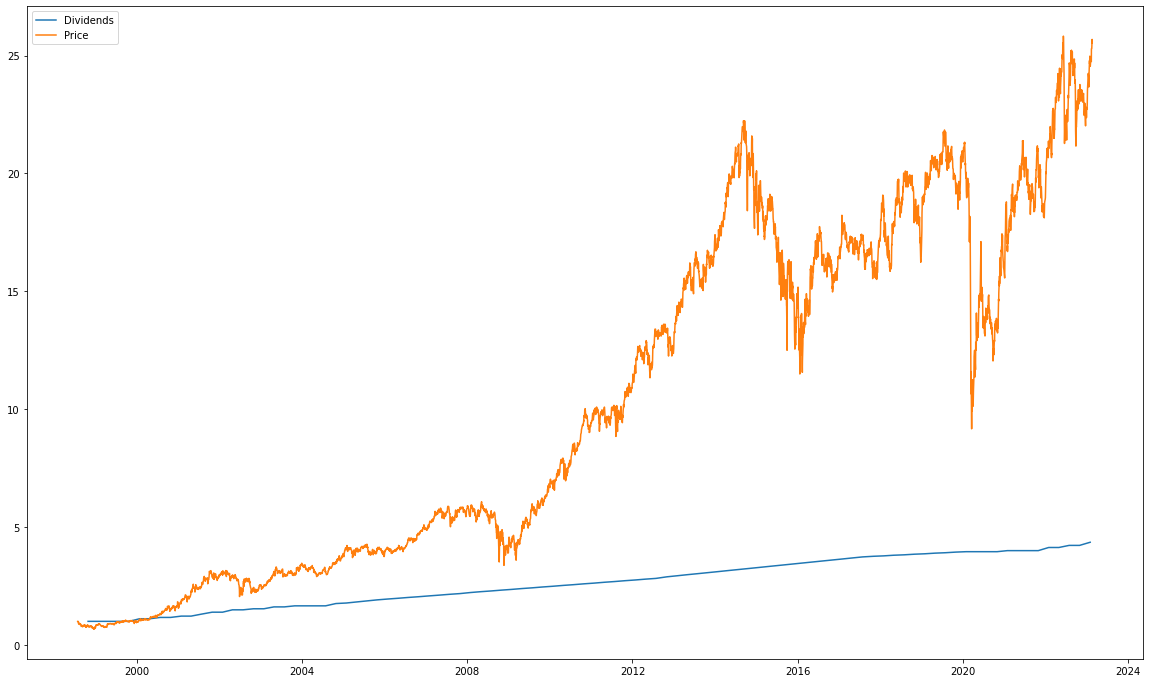

In [14]:
def price_change_to_div_change(ticker, s_year=None, e_year=3000):
    stock = yf.Ticker(ticker)
    tmp = stock.dividends
    div_df = pd.DataFrame(index=tmp.index)
    div_df["Dividends"] = tmp
    # div_df.index = div_df.index.year
    div_df = div_df.groupby(div_df.index).mean()
    div_df["chg"] = div_df["Dividends"].diff()
    div_df["chg"] = div_df["chg"].where(div_df["chg"] != 0, np.nan)

    history = stock.history(period="max", interval="1d")
    if history.empty:
        return False
    
    # comb = pd.DataFrame(index=history.index)
    # comb["Dividends"] = div_df["Dividends"] / div_df["Dividends"][0]
    # comb["Close"] = history["Close"] / history["Close"][0]
    data1 = div_df["Dividends"] / div_df["Dividends"][0]
    data2 = history["Close"] / history["Close"][0]
    if s_year:
        years = range(s_year, e_year)
        data1 = div_df.loc[div_df.index.year.isin(years)]["Dividends"] / div_df.loc[div_df.index.year.isin(years)]["Dividends"][0]
        data2 = history.loc[history.index.year.isin(years)]["Close"] / history.loc[history.index.year.isin(years)]["Close"][0]
    # data1_norm = data1 / data1[0]
    # data2_norm = data2 / data2[0]
    
    plt.figure(figsize=(20, 12))
    plt.plot(data1, label="Dividends")
    plt.plot(data2, label="Price")
    
    plt.legend()
    plt.show()

price_change_to_div_change("EPD")